In [1]:
# Importing relevant libraries

# Data wrangling
import numpy as np
import pandas as pd
from tqdm import tqdm

# Data Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Data pre-processing
from sklearn.preprocessing import StandardScaler

# Data splitting
from sklearn.model_selection import train_test_split

# Machine learning Models
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


# Evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc


#Installing dependencies
# !pip install -U kaleido

In [65]:
tra=pd.read_csv("C&T train dataset2.csv")
tra

,sno,cc_info,durtion_month,credit_history,purpose,svings_cc,employment_st,poi,personl_sttus,gurntors,...,property_type,ge,instllment_type,housing_type,credits_no,job_type,libles,telephone,foreigner,Group_no
0,1,11,6,34,43,65,75.0,4.0,93,101.0,...,121,67.0,143,152.0,2,173,1,192,201,3
1,2,12,48,32,43,61,73.0,2.0,92,101.0,...,121,22.0,143,152.0,1,173,1,191,201,1
2,3,14,12,34,46,61,74.0,2.0,93,101.0,...,121,49.0,143,152.0,1,172,2,191,201,2
3,4,11,42,32,42,61,74.0,2.0,93,103.0,...,122,45.0,143,153.0,1,173,2,191,201,1
4,5,11,24,33,40,61,73.0,3.0,93,101.0,...,124,53.0,143,153.0,2,173,2,191,201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,14,9,32,42,62,72.0,2.0,92,101.0,...,122,22.0,143,151.0,1,173,1,191,201,2
796,797,11,18,32,41,65,75.0,1.0,93,101.0,...,122,51.0,143,153.0,1,173,2,192,201,1
797,798,14,12,34,42,61,72.0,2.0,92,101.0,...,122,22.0,143,151.0,2,172,1,191,201,3
798,799,14,24,33,40,65,75.0,4.0,94,101.0,...,123,54.0,143,152.0,2,173,1,192,201,3


In [66]:
# shape of data
tra.shape

(800, 21)

In [67]:
tra.info


<bound method DataFrame.info of      sno  cc_info  durtion_month  credit_history  purpose  svings_cc  \
0      1       11              6              34       43         65   
1      2       12             48              32       43         61   
2      3       14             12              34       46         61   
3      4       11             42              32       42         61   
4      5       11             24              33       40         61   
..   ...      ...            ...             ...      ...        ...   
795  796       14              9              32       42         62   
796  797       11             18              32       41         65   
797  798       14             12              34       42         61   
798  799       14             24              33       40         65   
799  800       12              9              32       40         65   

     employment_st  poi  personl_sttus  gurntors  ...  property_type    ge  \
0             75.0  4.0  

In [68]:
tra.isnull().any().sum()

5

In [69]:
tr=tra

In [70]:
tr.dropna(inplace=True)

In [71]:
tr.shape

(761, 21)

## Target Feature
First we explore the values in the target column

In [72]:
target=tr['Group_no'].unique()

In [73]:
target

array([3, 1, 2], dtype=int64)

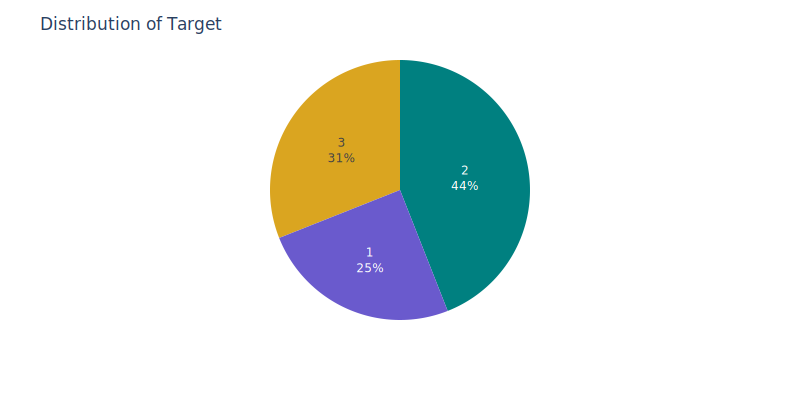

In [74]:
# Distribution of Target feature
fig = px.pie(values= tr['Group_no'].value_counts(),names= tr['Group_no'].value_counts().index.to_list())

fig.update_traces(textposition='inside', textinfo='percent+label',marker=dict(colors=['teal', 'goldenrod', 'slateblue']))

fig.update_layout(showlegend = False, height=400, width=800, title='Distribution of Target')
fig.write_image('fig.svg', engine='kaleido')
fig.show('svg')

## Data preparation

## 
Features selection
The easiest way to view how independent features are correlated is through correlation analysis.

This will help in feature selection and determine which independent variables can be dropped or combined to avoid Multicollinearity

We can visualize this using heat
maps



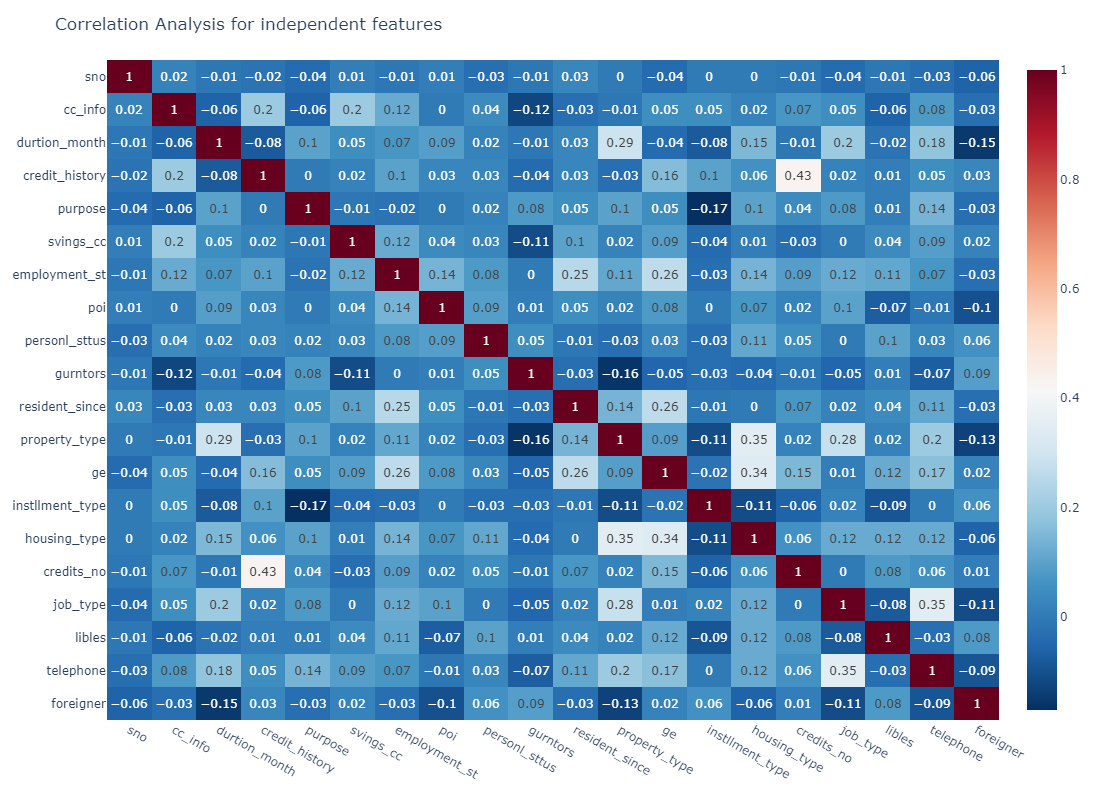

In [75]:
fig = px.imshow(tra.drop('Group_no', axis = 1).corr().round(2), text_auto=True, aspect="auto", color_continuous_scale='RdBu_r')
fig.update_layout(title = 'Correlation Analysis for independent features', height=800, width=1500)

In [76]:
te=pd.read_csv("C&T test dataset.csv")
te

,sno,acc_info,duration_month,credit_history,purpose,savings_acc,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,A14,24,A34,A46,A61,A75,4.0,A93,A101,4,A124,54.0,A143,A153,2,A173,2,A191,A201
1,2,A12,18,A34,A43,A61,A75,3.0,A92,A103,4,A121,48.0,A141,A151,2,A172,1,A192,A201
2,3,A11,20,A34,A42,A61,A75,1.0,A92,A101,4,A122,24.0,A143,A152,2,A173,1,A191,A201
3,4,A14,12,A34,A43,A65,A75,4.0,A93,A101,4,A123,35.0,A143,A152,2,A173,1,A191,A201
4,5,A12,12,A32,A40,A65,A71,1.0,A92,A101,2,A121,24.0,A143,A151,1,A171,1,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,A14,12,A32,A42,A61,A74,3.0,A92,A101,4,A121,31.0,A143,A152,1,A172,1,A191,A201
196,197,A11,30,A32,A41,A61,NaN,4.0,A91,A101,4,A122,40.0,A143,A152,1,A174,1,A192,A201
197,198,A14,12,A32,A43,A61,A75,4.0,A93,A101,4,A123,38.0,A143,NaN,1,A173,1,A191,A201
198,199,A11,45,A32,A43,A61,A73,4.0,A93,A101,4,A124,23.0,A143,A153,1,A173,1,A192,A201


In [77]:
te.shape

(200, 20)

## Data Processing


In [78]:
tra.head


<bound method NDFrame.head of      sno  cc_info  durtion_month  credit_history  purpose  svings_cc  \
0      1       11              6              34       43         65   
1      2       12             48              32       43         61   
2      3       14             12              34       46         61   
3      4       11             42              32       42         61   
4      5       11             24              33       40         61   
..   ...      ...            ...             ...      ...        ...   
795  796       14              9              32       42         62   
796  797       11             18              32       41         65   
797  798       14             12              34       42         61   
798  799       14             24              33       40         65   
799  800       12              9              32       40         65   

     employment_st  poi  personl_sttus  gurntors  ...  property_type    ge  \
0             75.0  4.0    

In [79]:
# Assigning x and y features
y = np.array(tra['Group_no'])
X_features = tra.drop('Group_no', axis = 1)
X_features.head()

,sno,cc_info,durtion_month,credit_history,purpose,svings_cc,employment_st,poi,personl_sttus,gurntors,resident_since,property_type,ge,instllment_type,housing_type,credits_no,job_type,libles,telephone,foreigner
0,1,11,6,34,43,65,75.0,4.0,93,101.0,4,121,67.0,143,152.0,2,173,1,192,201
1,2,12,48,32,43,61,73.0,2.0,92,101.0,2,121,22.0,143,152.0,1,173,1,191,201
2,3,14,12,34,46,61,74.0,2.0,93,101.0,3,121,49.0,143,152.0,1,172,2,191,201
3,4,11,42,32,42,61,74.0,2.0,93,103.0,4,122,45.0,143,153.0,1,173,2,191,201
4,5,11,24,33,40,61,73.0,3.0,93,101.0,4,124,53.0,143,153.0,2,173,2,191,201


In [80]:
y[:5]

array([3, 1, 2, 1, 1], dtype=int64)

In [81]:
# Normalizing data
scaler =  StandardScaler()
X = scaler.fit_transform(X_features)
X


array([[-1.73184068, -1.2682894 , -1.20374342, ..., -0.42192248,
         1.22608706, -0.18808017],
       [-1.7275087 , -0.4599408 ,  2.22317803, ..., -0.42192248,
        -0.81560277, -0.18808017],
       [-1.72317672,  1.15675641, -0.71418321, ...,  2.37010365,
        -0.81560277, -0.18808017],
       ...,
       [ 1.72074603,  1.15675641, -0.71418321, ..., -0.42192248,
        -0.81560277, -0.18808017],
       [ 1.72507801,  1.15675641,  0.2649372 , ..., -0.42192248,
         1.22608706, -0.18808017],
       [ 1.72940999, -0.4599408 , -0.95896331, ..., -0.42192248,
        -0.81560277, -0.18808017]])

## Model Building

In [82]:
trained_models=[]

In [83]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

In [84]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [85]:
# Calculate the baseline accuracy to beat
target_value, frequency = np.unique(y, return_counts = True)
print("Unique Values:", target_value)

print("Frequency Values:", frequency)

# Maximum frequency value
max_val = frequency.max()
length_y = len(y)

print('\n')

baseline_acc = round((max_val/length_y) * 100, 3)
print(f'The baseline accuracy to beat is {baseline_acc}%')



Unique Values: [1 2 3]
Frequency Values: [190 335 236]


The baseline accuracy to beat is 44.021%


## Random Forest

In [86]:
# Train a Random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict target values for training data
y_pred_train = rf_model.predict(X_train)
rf_acc_train = round(accuracy_score(y_train, y_pred_train), 3)

# Predict target values for validation data
y_pred_val = rf_model.predict(X_val)
rf_acc_val = round(accuracy_score(y_val, y_pred_val), 3)

print('With default parameters: ')
print(f'Accuracy of Random forest model on training data is {rf_acc_train * 100}%')
print(f'Accuracy of Random forest model on validation data is {rf_acc_val * 100}%')


With default parameters: 
Accuracy of Random forest model on training data is 100.0%
Accuracy of Random forest model on validation data is 60.699999999999996%


In [87]:
# Using Grid search to determine best parameters
param_grid = {
    'n_estimators': [25, 50, 75, 100],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),param_grid=param_grid, cv = 5)
# Fit Grid
grid_search.fit(X_train, y_train)
best_rf_parameters = grid_search.best_params_
print(f'Grid search parameters: {best_rf_parameters}')



Grid search parameters: {'max_depth': 9, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'n_estimators': 100}


In [88]:
# Train a Random forest model with best estimator from Grid search
grid_rf_model = RandomForestClassifier(random_state = 42,
                                       max_depth = best_rf_parameters['max_depth'],
                                      max_leaf_nodes = best_rf_parameters['max_leaf_nodes'],
                                      n_estimators = best_rf_parameters['n_estimators'],
                                       max_features = best_rf_parameters['max_features'])
grid_rf_model.fit(X_train, y_train)

# Predict target values for training data
y_pred_train = grid_rf_model.predict(X_train)
rf_acc_train = round(accuracy_score(y_train, y_pred_train), 3)

# Predict target values for validation data
y_pred_val = grid_rf_model.predict(X_test)
rf_acc_val = round(accuracy_score(y_test, y_pred_val), 3)

print('With Grid search best estimator parameters: ')
print(f'Accuracy of Random forest model on training data is {rf_acc_train * 100}%')
print(f'Accuracy of Random forest model on validation data is {rf_acc_val * 100}%')

With Grid search best estimator parameters: 
Accuracy of Random forest model on training data is 77.4%
Accuracy of Random forest model on validation data is 66.7%


In [89]:
# Predict target values for test data using default parameters
y_pred = grid_rf_model.predict(X_test)
rf_acc = round(accuracy_score(y_test, y_pred), 3)
print(f'Accuracy of Random forest model on test data is {rf_acc * 100}%')

# Add to model list
trained_models.append(grid_rf_model)

Accuracy of Random forest model on test data is 66.7%


## Test on data set


In [90]:
te=pd.read_csv("C&T test dataset2.csv")
te

,sno,cc_info,durtion_month,credit_history,purpose,svings_cc,employment_st,poi,personl_sttus,gurntors,resident_since,property_type,ge,instllment_type,housing_type,credits_no,job_type,libles,telephone,foreigner
0,1,14,24,34,46,61,75.0,4.0,93,101,4,124,54.0,143,153.0,2,173,2,191,201
1,2,12,18,34,43,61,75.0,3.0,92,103,4,121,48.0,141,151.0,2,172,1,192,201
2,3,11,20,34,42,61,75.0,1.0,92,101,4,122,24.0,143,152.0,2,173,1,191,201
3,4,14,12,34,43,65,75.0,4.0,93,101,4,123,35.0,143,152.0,2,173,1,191,201
4,5,12,12,32,40,65,71.0,1.0,92,101,2,121,24.0,143,151.0,1,171,1,191,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,14,12,32,42,61,74.0,3.0,92,101,4,121,31.0,143,152.0,1,172,1,191,201
196,197,11,30,32,41,61,NaN,4.0,91,101,4,122,40.0,143,152.0,1,174,1,192,201
197,198,14,12,32,43,61,75.0,4.0,93,101,4,123,38.0,143,NaN,1,173,1,191,201
198,199,11,45,32,43,61,73.0,4.0,93,101,4,124,23.0,143,153.0,1,173,1,192,201


In [91]:
te.isnull().any().sum()

4

In [92]:
te.dropna(inplace=True)

In [93]:
te.isnull().any().sum()

0

In [94]:
y_pred_train_test = rf_model.predict(te)

In [95]:
y_pred_train_test

array([1, 2, 2, 3, 3, 1, 3, 3, 1, 3, 3, 1, 1, 1, 1, 2, 3, 1, 3, 3, 3, 1,
       3, 2, 3, 2, 2, 1, 2, 2, 1, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 2, 2, 3, 1, 3, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 1,
       2, 2, 3, 2, 3, 2, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 2, 3, 1, 1, 1,
       3, 2, 2, 2, 1, 1, 2, 2, 1, 2, 3, 2, 2, 1, 3, 2, 1, 3, 2, 2, 2, 1,
       3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 3, 2, 3, 1, 3, 2, 1, 1, 2, 3, 2, 2,
       2, 1, 2, 3, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 1, 2,
       3, 2, 1, 1, 2, 2, 2, 3, 3, 2, 1, 2, 1, 2, 3, 1, 2, 1, 2, 3, 2, 1,
       3, 3, 1, 1], dtype=int64)

## SVM

In [96]:
# Iterating to see which kernel gives the best result
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
score_list = {}
scores = 0
svm_linear = []

for k in tqdm(kernels):
    svm_model = SVC(random_state = 42, kernel= k)
    svm_model.fit(X_train, y_train)
    if k == 'linear':
      svm_linear.append(svm_model)
    f_score = svm_model.score(X_val, y_val)
    score_list.update({k: f_score})


score_list

100%|███████████████████████████████████████████████| 4/4 [00:20<00:00,  5.24s/it]


{'linear': 0.6721311475409836,
 'poly': 0.45081967213114754,
 'rbf': 0.45081967213114754,
 'sigmoid': 0.4098360655737705}

In [97]:
max_val = max(score_list.values())
list_values = list(score_list.values())
list_keys = list(score_list.keys())

# Best kernel
k = list_keys[list_values.index(max_val)]

In [98]:
# Train a SVC model
svm_model = SVC(random_state = 42, kernel = k)
svm_model.fit(X_train, y_train)

# Predict target values for test data
y_pred = svm_model.predict(X_test)

# Evaluate the model's accuracy
svm_acc = round(accuracy_score(y_test, y_pred),3)
print(f'Accuracy of Support vector classifier model is {svm_acc * 100}%')

# Add to model list
trained_models.append(svm_model)

Accuracy of Support vector classifier model is 62.1%


## Accuracy for every model

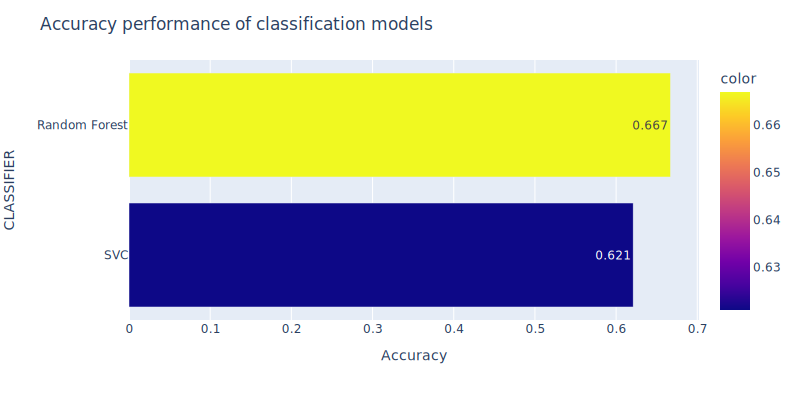

In [99]:
# Bar plot showing each classifier
accuracy_of_models = {'SVC': svm_acc,
                      'Random Forest': rf_acc,
                      }


fig = px.bar(y = list(accuracy_of_models.keys()), x= list(accuracy_of_models.values()),
             color = list(accuracy_of_models.values()),
             width = 800, height = 400,
             color_discrete_sequence=px.colors.qualitative.G10,
             labels={'y':'CLASSIFIER', 'x':'Accuracy'}, text_auto=True)


fig.update_layout(title='Accuracy performance of classification models', showlegend=False)
fig.write_image('fig.svg', engine='kaleido')
fig.show('svg')

## confussion matrix

best model confusion matrix


In [100]:
list_of_models = [ 'SVC','Random Forest']
dictionary_models = {list_of_models[i]: trained_models[i] for i in range(len(list_of_models))}
dictionary_models

{'SVC': RandomForestClassifier(max_depth=9, max_leaf_nodes=9, random_state=42),
 'Random Forest': SVC(kernel='linear', random_state=42)}

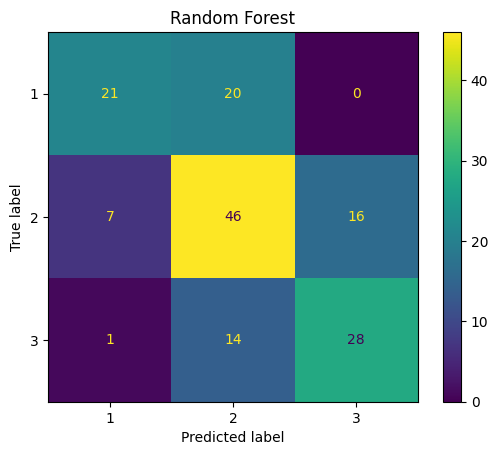

In [101]:
# Find the highest score
scores = [svm_acc, rf_acc]
best_score = max(scores)
key_best_model = ''
best_model = ''

# Generate a heatmap for the classifier that has the highest score
for key, value in accuracy_of_models.items():
  if best_score == value:
    key_best_model = key
    best_model = dictionary_models[key_best_model]
    ConfusionMatrixDisplay.from_estimator(best_model,
                                          X_test, y_test,
                                          display_labels=['1', '2','3'])
    plt.title(key_best_model);

    #Pop the best performing model from dictionary
    dictionary_models.pop(key_best_model)




## Feature importence

In [102]:
# create list for features
feature = X_features.columns

In [103]:
# Random forest
rf_importance = pd.Series(np.exp(rf_model.feature_importances_), index = feature).sort_values()

# SVM linear kernel
svm_importance = pd.Series(np.exp(svm_linear[0].coef_[0]), index = feature).sort_values()


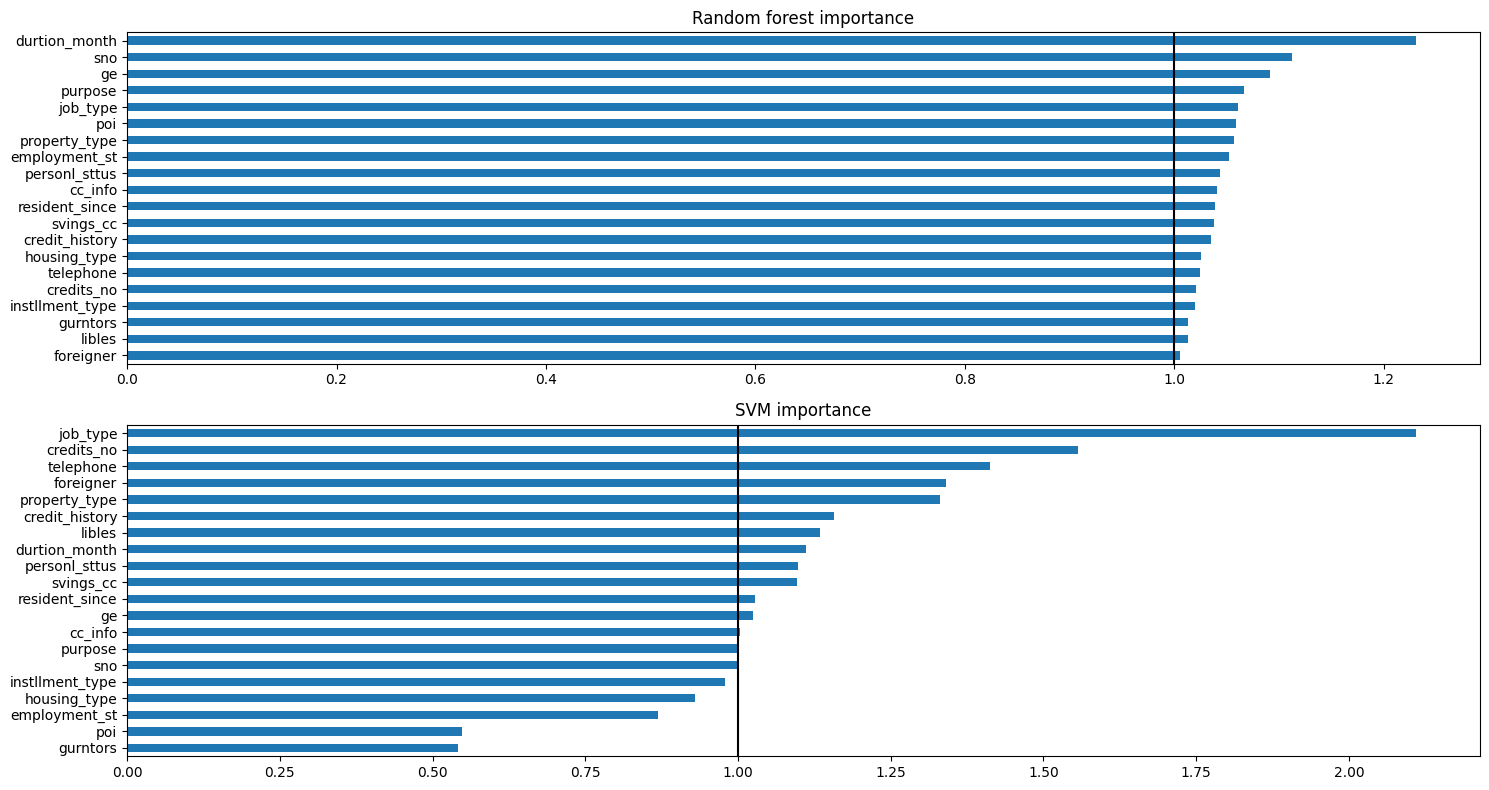

In [104]:
# Create subplots
fig, ax = plt.subplots(2, figsize=(15, 8))

# Add the barplots
rf_importance.plot(kind = 'barh', ax = ax[0], title = 'Random forest importance')
svm_importance.plot(kind='barh', ax = ax[1], title = 'SVM importance')

# Add vertical lines at x=1
for axes_row in ax:
    axes_row.axvline(x=1, color='black')
plt.tight_layout()
plt.show()


In [107]:
# ROC curve for best model's predictions
y_pred = best_model.predict(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('\n')
# Print the AUC score
print(f'The AUC score is :{round(roc_auc, 2)}')

ValueError: multiclass format is not supported